In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.svm import NuSVC

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import confusion_matrix

def fix_age(age) -> np.int8:
    if age == '[0-10)':
        return 5
    elif age == '[10-20)':
        return 15
    elif age == '[20-30)':
        return 25
    elif age == '[30-40)':
        return 35
    elif age == '[40-50)':
        return 45
    elif age == '[50-60)':
        return 55
    elif age == '[60-70)':
        return 65
    elif age == '[70-80)':
        return 75
    elif age == '[80-90)':
        return 85
    elif age == '[90-100)':
        return 95


def fix_demographics(row) -> np.int8:
    if row['gender'] == 'Female':
        if row['race'] == 'Caucasian':
            return 1
        elif row['race'] == 'Asian':
            return 2
        elif row['race'] == ' AfricanAmerican':
            return 3
        elif row['race'] == 'Hispanic':
            return 4
        elif row['race'] == 'Other':
            return 5
        else:
            return 6
    elif row['gender'] == 'Male':
        if row['race'] == 'Caucasian':
            return 7
        elif row['race'] == 'Asian':
            return 8
        elif row['race'] == ' AfricanAmerican':
            return 9
        elif row['race'] == 'Hispanic':
            return 10
        elif row['race'] == 'Other':
            return 11
        else:
            return 12
    else:
        if row['race'] == 'Caucasian':
            return 13
        elif row['race'] == 'Asian':
            return 14
        elif row['race'] == ' AfricanAmerican':
            return 15
        elif row['race'] == 'Hispanic':
            return 16
        elif row['race'] == 'Other':
            return 17
        else:
            return 18


def data_normalization(item) -> np.int8:
    # Values: “>200,” “>300,”“normal,” and “none” if not measured
    if item == 'None' or item == 'No' or item == 'NO':
        return 0
    elif item == 'Yes' or item == 'Ch' or item == 'Steady' or item == '<30' or item == 'Norm':
        return 1
    elif item == '>30' or item == 'Up' or item == '>200' or item == '>7':
        return 2
    elif item == '>300' or item == 'Down' or item == '>8':
        return 3
    elif item == '?':
        return None
    else:
        return item



# def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(val_X)
#     mae = mean_absolute_error(val_y, preds_val)
#     return(mae)



    # # read file to dataframe
    # df = pd.read_csv("diabetic_data.csv")

    # # remove data that is irrelevant
    # df = df.drop(['encounter_id', 'weight', 'patient_nbr', 'discharge_disposition_id', 'admission_source_id',
    #             'payer_code', 'number_outpatient', 'number_emergency', 'number_inpatient', 'medical_specialty'], axis=1)
   
    # # prepare data for a Classification or Clustering machine learning 
    # # algorithm by converting data to numeric or nominal format
    # df['age'] = df['age'].apply(fix_age)
    # df['demographics'] = df.apply(fix_demographics, axis=1)
    # df = df.applymap(lambda item: data_normalization(item))
    # # df['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide,glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'] = df['max_glu_serum',

    # # df.info()
    # # df.dropna(axis=1, thresh=10)
    # # remove data that has null values
    # df  = df.drop(['gender', 'race'], axis=1)
    # df.dropna(axis=0)

    # print(df.head())

    # # divide 80/20 for training and testing
    # df1 = df[df.index % 5 != 0]  # Excludes every 5th row starting from 0
    # df2 = df[df.index % 5 == 0]  # Selects every 5th raw starting from 0

    
    # df1.to_csv("diabetic_data_training.csv")
    # df2.to_csv("diabetic_data_testing.csv")

    ###############################################################new preprocessing ##########################################################################

    # read file to dataframe
df = pd.read_csv("diabetic_data.csv")

df=df.drop(['encounter_id', 'weight', 'patient_nbr', 'discharge_disposition_id', 'admission_source_id',
                          'payer_code', 'number_outpatient', 'number_emergency', 'number_inpatient', 'medical_specialty'], axis=1)

df1 = df[df.index % 5 != 0]  # Excludes every 5th row starting from 0
df2 = df[df.index % 5 == 0]  # Selects every 5th raw starting from 0

NUMERIC_COLUMNS = [ 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']
  # remove numeric columns
df=df.drop(columns=NUMERIC_COLUMNS)

  # remove data that has null values
df = df.dropna(axis=0)


  # label encoding
for col in df.columns:
  df[col] = LabelEncoder().fit_transform(df[col])


  # making all variables categorical
for col in df.columns:
  df[col] = df[col].astype('category')











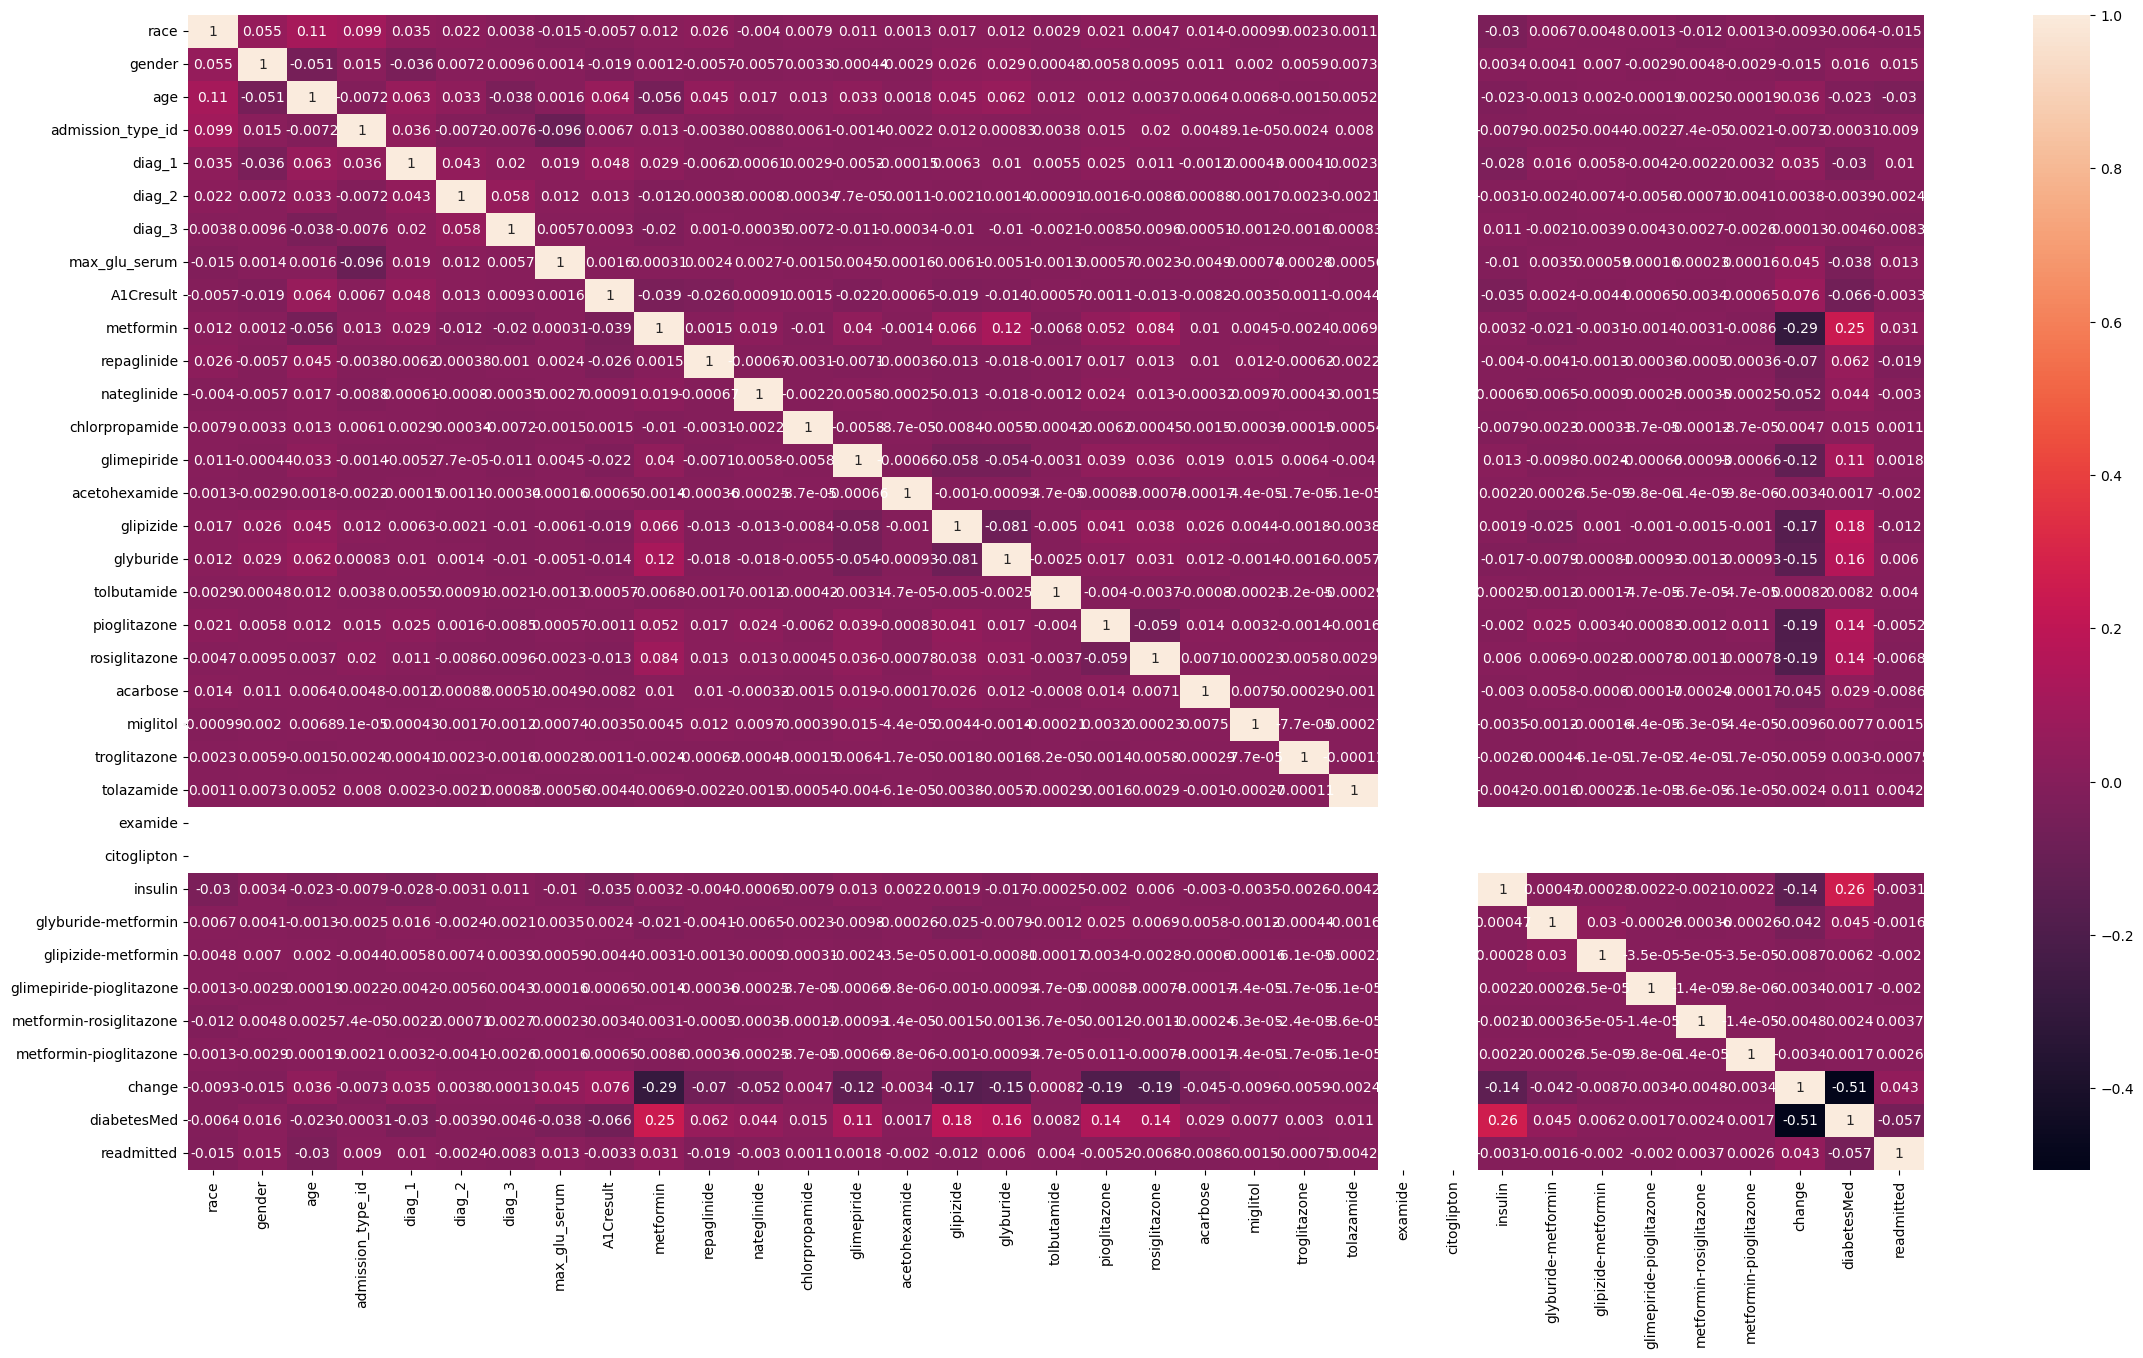

Relevant Features
metformin        0.245477
glimepiride      0.114282
glipizide        0.181876
glyburide        0.161360
pioglitazone     0.144890
rosiglitazone    0.135326
insulin          0.264170
change           0.506370
diabetesMed      1.000000
Name: diabetesMed, dtype: float64


In [8]:
# print(df.describe(include = 'all'))
# print(df.isnull().sum())


# Multiple columns integer conversion

df[['race','gender','age','admission_type_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide' ,'chlorpropamide','glimepiride' ,'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone' ,'rosiglitazone' ,'acarbose','miglitol' ,'troglitazone','tolazamide' ,'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change' ,'diabetesMed','readmitted' ]] = df[['race','gender','age','admission_type_id','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide' ,'chlorpropamide','glimepiride' ,'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone' ,'rosiglitazone' ,'acarbose','miglitol' ,'troglitazone','tolazamide' ,'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change' ,'diabetesMed','readmitted' ]].astype(int)
# print(df.dtypes)


# corr_matrix = df.corr(numeric_only = True)
corr_matrix = df.corr()
plt.figure(figsize=(28,15))

# print(corr_matrix)
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

cor_target = abs(corr_matrix["diabetesMed"])
relevant_features = cor_target[cor_target>0.1]
print("Relevant Features")
print(relevant_features)


In [9]:
Y = df['readmitted']

df = df.drop('readmitted', axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(df, Y, test_size=0.2, random_state=42)

# train_X.to_csv("diabetic_data_training.csv")
# test_X.to_csv("diabetic_data_testing.csv")

print(train_X.values)

train_X = train_X.values
test_X = test_X.values
train_Y = train_Y.values
test_Y = test_Y.values

# check if shape[0] matches original
# print("train shape: ", train_df.shape, "original: ", df1.shape)
# print("test shape: ", test_df.shape, "original: ", df2.shape)

# print(Y.head())

# Encoding Target
# Y = LabelEncoder().fit_transform(Y)

# sanity check to see numbers match and matching with previous counter to create target dictionary
# print(Counter(df1['readmitted']))
# print(Counter(Y))
target_dict = {
      'NO': 2,
      '>30': 1,
      '<30': 0,
}

###########################################building model decision Tree ##################################################
model = DecisionTreeClassifier(criterion="entropy", random_state=0)
X = train_X
y = train_Y
model.fit(X, y)

predicted_values = model.predict(test_X)
  

y_pred = predicted_values.astype(int)
y_test = test_Y

print(y_pred)

print(y_test)

print("Decision Trees Evaluation")

print(f1_score(y_test, y_pred, average='macro'))

print(f1_score(y_test, y_pred, average='micro'))

print(f1_score(y_test, y_pred, average='weighted'))  

print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

# plt.figure(figsize=(12,8))

# tree.plot_tree(model.fit(X, y))

  




######################################building model SVC #########################################


# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)

  # # print(clf.predict(test_X))

  # predicted_values = clf.predict(test_X)

  # y_pred = predicted_values.astype(int)
  # y_test = test_Y


  # print("SVC Evaluation")

  # print(f1_score(y_test, y_pred, average='macro'))

  # print(f1_score(y_test, y_pred, average='micro'))

  # print(f1_score(y_test, y_pred, average='weighted')) 

  # print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))




###################################building model NuSVC #########################################

  # clf = make_pipeline(StandardScaler(), NuSVC())
  # clf.fit(X, y)

  # print(clf.predict(test_X))

  # predicted_values = clf.predict(test_X)

  # output = predicted_values
  # True_Output = test_Y


  # print(f1_score(True_Output, output, average='macro'))

  # print(f1_score(True_Output, output, average='micro'))

  # print(f1_score(True_Output, output, average='weighted')) 


################################# building model LinearSVC ########################################

  # print("Linear SVC")
  # print(" ")

  # L_X = X
  # L_y = y

  # L_X, L_y = make_classification(n_features=35, random_state=0)
  # clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
  # clf.fit(L_X, L_y)

  # print(clf.named_steps['linearsvc'].coef_)

  # print(clf.named_steps['linearsvc'].intercept_)

  # predicted_values = clf.predict(test_X)

  # y_pred = predicted_values.astype(int)
  # y_test = test_Y

  # print("Linear SVC Evaluation")

  # print(f1_score(y_test, y_pred, average='macro'))

  # print(f1_score(y_test, y_pred, average='micro'))

  # print(f1_score(y_test, y_pred, average='weighted')) 

  # print(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

[[3 0 7 ... 0 1 0]
 [3 1 5 ... 0 1 0]
 [3 1 8 ... 0 1 1]
 ...
 [3 1 7 ... 0 0 1]
 [3 0 6 ... 0 0 1]
 [3 0 4 ... 0 0 1]]
[2 2 2 ... 1 1 2]
[2 2 2 ... 1 1 2]
Decision Trees Evaluation
0.34811214521382405
0.4387344011005207
0.4416663293120634
0.43873440110052075
